<a href="https://colab.research.google.com/github/F1avie/ModIA_TP1/blob/master/code/nlp/INSA_NLP_TP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset

During this practical session, we will use on the [AG's corpus of news article]():  
*AG News (AG’s News Corpus) is a subdataset of [AG's corpus](http://groups.di.unipi.it/~gulli/AG_corpus_of_news_articles.html) of news articles constructed by assembling titles and description fields of articles from the 4 largest classes (“World”, “Sports”, “Business”, “Sci/Tech”) of AG’s Corpus. The AG News contains 30,000 training and 1,900 test samples per class.*  

Let's first download the dataset:

In [1]:
!wget https://github.com/mhjabreel/CharCnn_Keras/raw/master/data/ag_news_csv/train.csv 2>&1
!wget https://github.com/mhjabreel/CharCnn_Keras/raw/master/data/ag_news_csv/test.csv 2>&1

--2022-11-14 08:38:41--  https://github.com/mhjabreel/CharCnn_Keras/raw/master/data/ag_news_csv/train.csv
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv [following]
--2022-11-14 08:38:41--  https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29470338 (28M) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  28.10M  --.-KB/s    in 0.1s    

2022-11-14 08:38:41 (256 MB/s) - ‘train.csv’ saved [29470338/29470338]

--2022-1

The following code will load the dataset and add the label names in a new column.

In [140]:
import pandas as pd

traindf = pd.read_csv('train.csv', names=["label", "title", "text"]).sample(2000)
testdf = pd.read_csv('test.csv', names=["label", "title", "text"]).sample(1000)

traindf['label'] = traindf['label'] -1
traindf['label_name'] = traindf.label.map({0:"World", 1:"Sports", 2:"Business", 3:"Sci/Tech"})
testdf['label'] = testdf['label'] -1
testdf['label_name'] = testdf.label.map({0:"World", 1:"Sports", 2:"Business", 3:"Sci/Tech"})
testdf

,label,title,text,label_name
6660,1,Prosecutor: Pacers Players to Be Charged (AP),AP - Indiana Pacers players will be charged fo...,Sports
6020,3,AOL beefs up its homeland security,AOL has added a range of features to ward off ...,Sci/Tech
2754,3,Supernova Warning System Will Give Astronomers...,Duke University -- A Supernova Early Warning S...,Sci/Tech
3857,2,"Shoppers return in September, sales up 1.5","Shoppers were out last month, propelling sales...",Business
7257,0,Moves toward moderation in Mideast,"One month after Yasser Arafat #39;s death, rea...",World
...,...,...,...,...
2869,2,Merck Pulls Arthritis Drug from Market,NEW YORK (Reuters) - Merck Co Inc. &lt;A HR...,Business
293,3,"Swap Your PC, or Your President",The producer of ads featuring PC users who swi...,Sci/Tech
5439,3,"Cable and Wireless to cut 600 jobs, shut Londo...","AFP - Cable and Wireless, the struggling Briti...",Sci/Tech
1736,1,Valley Stars Struggle to Settle,Alan Curbishley admits Charltons summer signin...,Sports


Start with a little bit of exploration:  
Using the Wordcloud library and follow the example provided by the [documentation](https://amueller.github.io/word_cloud/auto_examples/simple.html#sphx-glr-auto-examples-simple-py) to plot the most common words in the corpus.  
Do do so, you should starts by joining all documents within a single one. A simple way consits in using the ```" ".join()``` function on a list of text...

Reuters - U.S. consumer prices rose an\as-expected 0.2 percent last month, a government report showed\on Tuesday, but a sharp jump in lodging costs helped push core\inflation up at its fastest pace in five months. TOKYO (Reuters) - The dollar inched up on Monday but  traders struggled to find direction in a market devoid of  economic data.THE UN nuclear watchdog must accept Iran #39;s right to enrich uranium as part of its civil nuclear program, Iranian President Mohammad Khatami said today.Google IPO and Effect on Venture Capital Industry\\Will the Google IPO have any impact on the Venture Capital market?  FundingPost surveyed 32 Venture Capitalists and Angel Investors for their opinions.  FundingPost is happy to share these responses from leading venture investors as it should help guide CEOs of ...AP - Sony Corp. plans to begin selling home servers for broadband and high-definition TV systems powered by a revolutionary new computer chip in 2006, the Japanese electronics and entertai

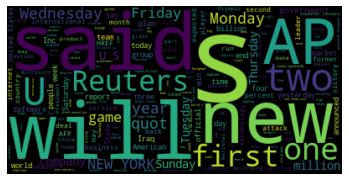

In [141]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
a = traindf["text"]
corpus = "".join(a)
print(corpus)
wordcloud = WordCloud().generate(corpus)
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

By default Wordcloud removes the most common words used in english (and, or, the, a ...). It is still possible to provide a custom list. 
[NLTK](https://www.nltk.org/) is a powerfull library for natural language processing. It provides a several lists of stop words that can be used to clean text.  
Even if it doesn't change the result here let's provide Wordcloud with a custom list of stopwords taken from NLTK.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


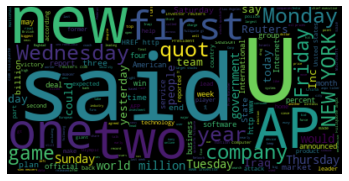

In [142]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 

wordcloud = WordCloud(stopwords=stop_words).generate(corpus)
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Now, plot a different wordcloud for every category in the dataset.  
Would you be capable of predicting the categories given only thiese wordclouds?

        label                                              title  \
32499       0  Website video purports to show beheadings of t...   
40893       0                              Taj Mahal anniversary   
77431       0       Report: Japanese Hostage Killed in Iraq (AP)   
35210       0  Malaysia's Anwar mulls multi-party alliance (AFP)   
26207       0     Rightist Party Threatens to Bolt Israeli Gov't   
...       ...                                                ...   
83498       0               Envoys Report Progress in Iran Talks   
113425      0  Gavaskar to Tendulkar: Go for 50 Test centurie...   
36493       0  N.Korea May Be Preparing Missile Launch-Paper ...   
94869       0          Karachi bomb  #39;mastermind #39; quizzed   
50402       0         Bremer: U.S. Paid Price for Lack of Troops   

                                                     text label_name  
32499   A videotape posted by on a website showed the ...      World  
40893   India celebrates the 350th annive

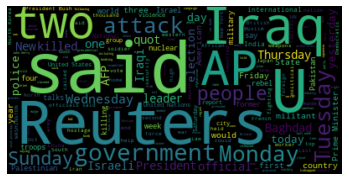

In [143]:
groups = traindf.groupby(traindf.label)
print(zero)
zero = groups.get_group(0)
z = zero["text"]

corpusz = "".join(z)
wordcloud = WordCloud(stopwords=stop_words).generate(corpusz)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

       label                                              title  \
39579      1           A Canceled Trip Leads to an Easy Victory   
18208      1                              Red Sox Still Rolling   
33839      1     Sportsview: Attitude Change May Help U.S. (AP)   
9546       1    U.S. Women's Hoops Team Cruises Into Semis (AP)   
42703      1          Turin Unveils Mascots as Countdown Begins   
...      ...                                                ...   
4538       1                       Thursday #39;s Golf Capsules   
39371      1                     #39;Probably not my fault #39;   
27116      1                           ICC bagged over mismatch   
42730      1    Mascots for Turin Winter Olympics Unveiled (AP)   
62427      1  Referee halts Dutch league match over crowd in...   

                                                    text label_name  
39579  Carmen Douma-Hussar thought she would be enjoy...     Sports  
18208  Pedro Martinez pulls Boston within 2 1/2 games..

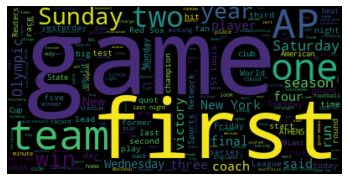

In [144]:
un = groups.get_group(1)
print(un)
u = un["text"]

corpusu = "".join(u)
wordcloud = WordCloud(stopwords=stop_words).generate(corpusu)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

        label                                              title  \
64938       2  U.S. Core Inflation Hotter Than Expected (Reut...   
7016        2                  Dollar Edges Up, Direction Sought   
104031      2                 Top clubs 'should run UK football'   
114521      2                       European Shares Edge Upwards   
27333       2  ALITALIA: AGREEMENT WITH PILOTS #39; UNION FAL...   
...       ...                                                ...   
14291       2                      UBS to Buy Schwab Units - WSJ   
38091       2                    PUC fines Cingular \$12 million   
8562        2  SCH still expects to close Abbey takeover by y...   
75069       2             Fed Reports Continuing Economic Growth   
82005       2                  Textiles boost Bangladesh exports   

                                                     text label_name  
64938   Reuters - U.S. consumer prices rose an\as-expe...   Business  
7016     TOKYO (Reuters) - The dollar inc

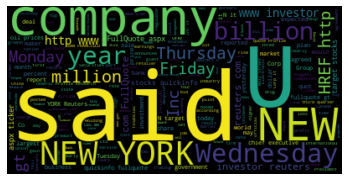

In [145]:
deux = groups.get_group(2)
print(deux)
d = deux["text"]

corpusd = "".join(d)
wordcloud = WordCloud(stopwords=stop_words).generate(corpusd)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

        label                                              title  \
8901        3  Google IPO and Effect on Venture Capital Industry   
104036      3       Sony Discloses Details on Computer Chip (AP)   
76432       3                                   E-Commerce Times   
95366       3  Peninsula Grill serves up toasty grilled chees...   
69710       3                         Yahoo buys email search co   
...       ...                                                ...   
28603       3                                 Tuning up for HDTV   
19126       3       Home Designed to Produce Energy It Uses (AP)   
107026      3    Microsoft Unveils New Communication, Blog Tools   
218         3          GAO Calls Stryker Too Heavy for Transport   
87274       3      Cyber Crime Tools Could Serve Terrorists -FBI   

                                                     text label_name  
8901    Google IPO and Effect on Venture Capital Indus...   Sci/Tech  
104036  AP - Sony Corp. plans to begin se

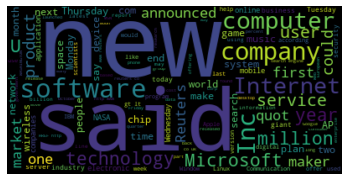

In [146]:
trois = groups.get_group(3)
print(trois)
t = trois["text"]

corpust = "".join(t)
wordcloud = WordCloud(stopwords=stop_words).generate(corpust)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Bag-of-Words  
We will now train different models to predict the category of these news articles.  
We saw, during the course, a first approach called "*bag of words*".  
BOW methods describe documents using counts or statistics on the words composing the documents. Once the bag-of-words is computed, documents are represented by vectors whose dimensions correspond to words present in the corpus vocabulary.  

First, we will vectorize our documents using term frequencies.  
Look at the documentation of [scikit-learn's CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) to encode the __text column__ of your training set.

In [147]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(traindf["text"])

The ```vocabulary_``` argument of your vectorizer contains a dictionnary with all the token and their corresponding index in the bag-of-words.  
How many unique tokens compose you bag-of-words?

In [148]:
len(vectorizer.vocabulary_)

10285

You can also use the ```get_feature_names_out()``` method to get the list of identified tokens:

In [149]:
vectorizer.get_feature_names_out()

array(['00', '000', '000bn', ..., 'zits', 'zone', 'zurich'], dtype=object)

Now choose a classification method from scikit-learn and train it to classify news article.  
Print the classification score of your model on the training set.

In [150]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X, traindf['label'] )
clf.score(X, traindf['label'] )

1.0

Now use the ```transform``` method from your vectorizer on the testing set and print the score obtained by your model on the testing set.  
Your model is probably overfitting a lot.  
Plot a [consusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html), to see where your model makes most mistakes.

In [151]:
Xtest = vectorizer.transform(testdf["text"])
clf.score(Xtest, testdf['label'] )

0.774

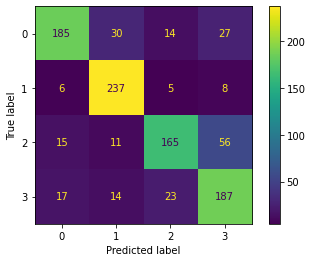

In [152]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions = clf.predict(Xtest)
cm = confusion_matrix(testdf['label'], predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot() 

Play with some of the vectorizer hyper-parameters to see whether you can improve the perfomance of your classifier on the testing set.  
Try adding stopwords or changing the ngram_range...

10153
score:  0.781


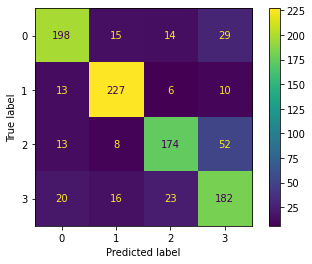

In [160]:
vectorizerst = CountVectorizer(stop_words=stop_words)
Xst = vectorizerst.fit_transform(traindf["text"])
print(len(vectorizerst.vocabulary_))
clfst = RandomForestClassifier()
clfst.fit(Xst, traindf['label'] )
clfst.score(Xst, traindf['label'] )
Xtestst = vectorizerst.transform(testdf["text"])
print('score: ' , clfst.score(Xtestst, testdf['label'] ))

predictionsst = clfst.predict(Xtestst)

cmst = confusion_matrix(testdf['label'], predictionsst, labels=clf.classes_)
dispst = ConfusionMatrixDisplay(confusion_matrix=cmst,display_labels=clf.classes_)
dispst.plot() 

Once you are satisfied with the performance or that you do not manage to improve it, plot a t-SNE of your training representations with labels as colors.  
In particular, compare the t-SNE representations computed with and without stop words.  
What do you observe?

In [154]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns 

X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity= 4).fit_transform(X)
X_embeddedst = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity= 4).fit_transform(Xst)

<function matplotlib.pyplot.show(*args, **kw)>

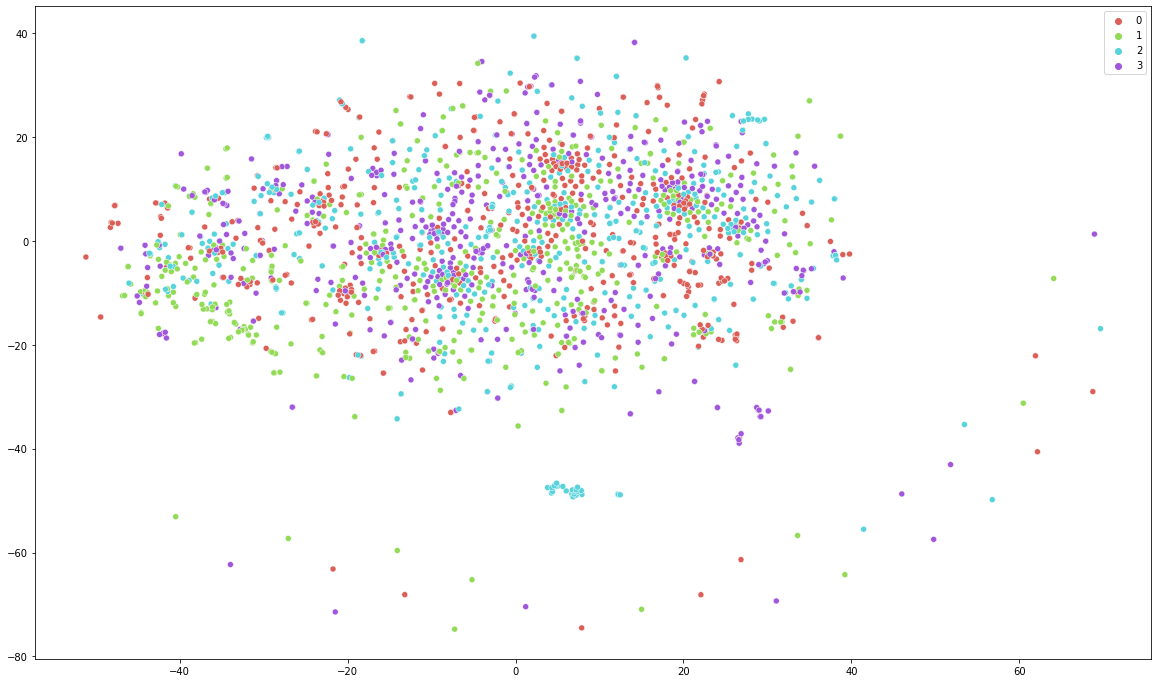

In [155]:
plt.figure(figsize=(20,12))
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], palette=sns.color_palette("hls", 4),hue=traindf["label"].tolist())
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

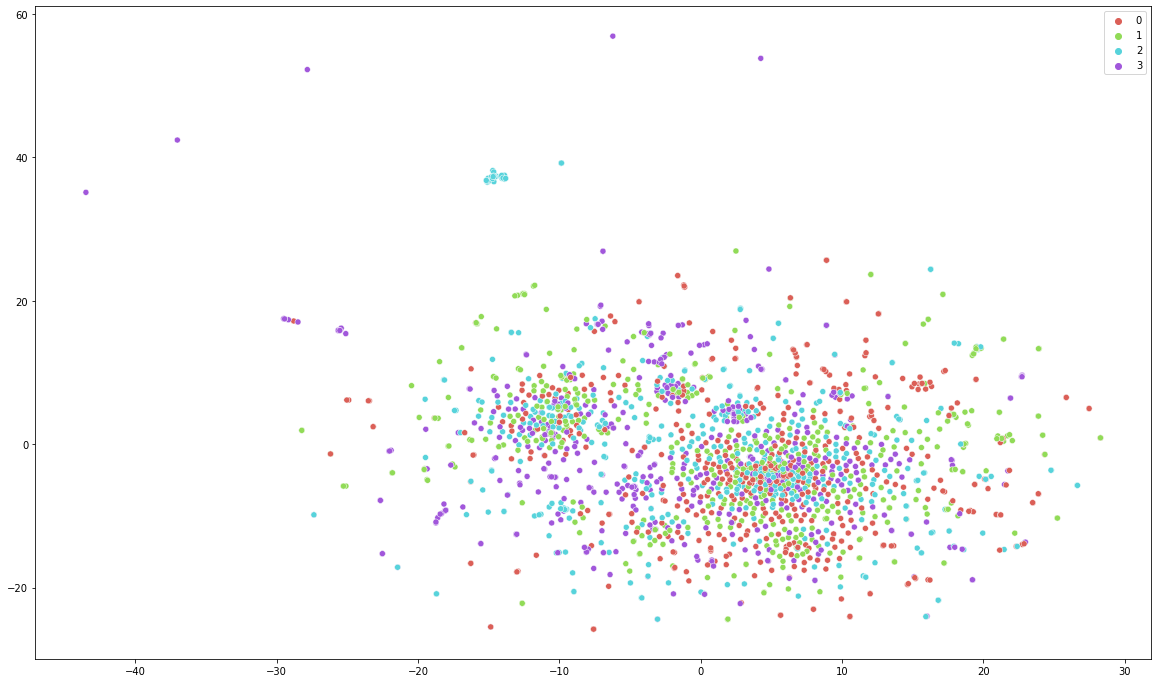

In [156]:
plt.figure(figsize=(20,12))
sns.scatterplot(x=X_embeddedst[:,0], y=X_embeddedst[:,1], palette=sns.color_palette("hls", 4), hue=traindf["label"].tolist())
plt.show

We will now use a second type of vectorization strategy, a little bit more efficient than pure term frequency: TF-idf.  
What is the difference with the previous method?  
Use [scikit-lear's ```TfidfVectorizer```](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer) to vectorize the documents in your corpus and train a classification algorithm to classify documents.  
Print the score you obtain on the testing set and the corresponding confusion matrix.


score:  0.77


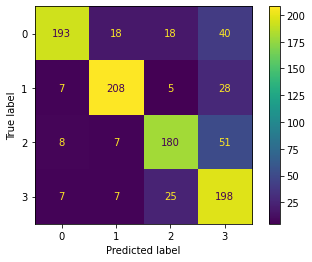

In [158]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform(traindf["text"])

RF = RandomForestClassifier()
RF.fit(X, traindf['label'] )
RF.score(X, traindf['label'] )
Xtest = vectorizer.transform(testdf["text"])
print('score: ' , RF.score(Xtestst, testdf['label'] ))
pred = RF.predict(Xtest)
cm = confusion_matrix(testdf['label'], pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cmst,display_labels=clf.classes_)
disp.plot() 

Plot a t-SNE of the representations obtained using TF-IDF.

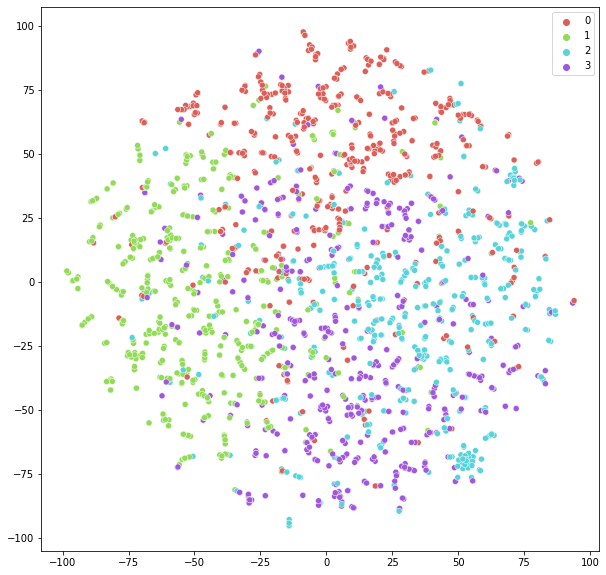

In [161]:
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity= 3).fit_transform(X)
plt.figure(figsize=(10,10))                  
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], palette=sns.color_palette("hls", 4),hue=traindf["label"].tolist())
plt.show()

Both the ```TfidfVectorizer``` and ```CountVeccorizer``` use a default strategy to create a token given a text consisting in using whitespaces and punctuations as separators.  
It is possible to provide custom __tokenizers__ to these vectorizers.  
Here we will use NLTK to build a more powerfull tokenizer that will:

*   Revmove stop words
*   Convert all texts to lower case
*   Ignore punctuations symbols
*   Only consider letters
*   Perform Stemming on every token



In [162]:
from nltk import word_tokenize          
from nltk.stem import SnowballStemmer
import nltk
from nltk.corpus import stopwords
import re


nltk.download('punkt')
nltk.download('stopwords')
# Download stopwords list

stop_words = set(stopwords.words('english')) 

# Interface lemma tokenizer from nltk with sklearn
class StemTokenizer:
    ignore_tokens = [',', '.', ';', ':', '"', '``', "''", '`']
    def __init__(self):
        self.stemmer = SnowballStemmer('english')
    def __call__(self, doc):
        doc = doc.lower()
        return [self.stemmer.stem(t) for t in word_tokenize(re.sub("[^a-z' ]", "", doc)) if t not in self.ignore_tokens]

tokenizer=StemTokenizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Print an example of text from the dataset and the corresponding tokens computed by the tokenizer.

In [163]:
[tokenizer(t) for t in traindf['text']]

[['reuter',
  'us',
  'consum',
  'price',
  'rose',
  'anasexpect',
  'percent',
  'last',
  'month',
  'a',
  'govern',
  'report',
  'showedon',
  'tuesday',
  'but',
  'a',
  'sharp',
  'jump',
  'in',
  'lodg',
  'cost',
  'help',
  'push',
  'coreinfl',
  'up',
  'at',
  'it',
  'fastest',
  'pace',
  'in',
  'five',
  'month'],
 ['tokyo',
  'reuter',
  'the',
  'dollar',
  'inch',
  'up',
  'on',
  'monday',
  'but',
  'trader',
  'struggl',
  'to',
  'find',
  'direct',
  'in',
  'a',
  'market',
  'devoid',
  'of',
  'econom',
  'data'],
 ['the',
  'un',
  'nuclear',
  'watchdog',
  'must',
  'accept',
  'iran',
  's',
  'right',
  'to',
  'enrich',
  'uranium',
  'as',
  'part',
  'of',
  'it',
  'civil',
  'nuclear',
  'program',
  'iranian',
  'presid',
  'mohammad',
  'khatami',
  'said',
  'today'],
 ['googl',
  'ipo',
  'and',
  'effect',
  'on',
  'ventur',
  'capit',
  'industrywil',
  'the',
  'googl',
  'ipo',
  'have',
  'ani',
  'impact',
  'on',
  'the',
  'ventur

In [164]:
t = traindf['text'].iloc[1]
print(t)
tokenizer(t)

 TOKYO (Reuters) - The dollar inched up on Monday but  traders struggled to find direction in a market devoid of  economic data.


['tokyo',
 'reuter',
 'the',
 'dollar',
 'inch',
 'up',
 'on',
 'monday',
 'but',
 'trader',
 'struggl',
 'to',
 'find',
 'direct',
 'in',
 'a',
 'market',
 'devoid',
 'of',
 'econom',
 'data']

Now provide the tokenizer to the a ```TfidfVectorizer``` and restart the entire pipeline.  
Does it improves the testing performance?  
Tips: you should also provided a tokenized version of the stopwords since we apply stemming on all tokens.

score:  0.755


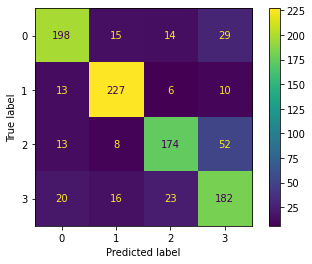

In [165]:
token_stop = tokenizer(' '.join(stop_words))

tfidf = TfidfVectorizer(stop_words=token_stop, tokenizer=tokenizer)
X = vectorizer.fit_transform(traindf["text"])
RF = RandomForestClassifier()
RF.fit(X, traindf['label'] )
RF.score(X, traindf['label'] )
Xtest = vectorizer.transform(testdf["text"])
print('score: ' , RF.score(Xtestst, testdf['label'] ))
pred = RF.predict(Xtest)
cm = confusion_matrix(testdf['label'], pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cmst,display_labels=clf.classes_)
disp.plot() 

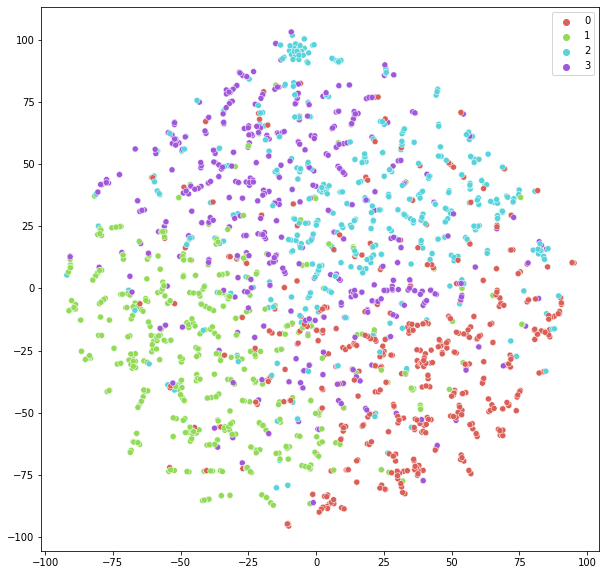

In [166]:
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity= 3).fit_transform(X)
plt.figure(figsize=(10,10))                  
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], palette=sns.color_palette("hls", 4),hue=traindf["label"].tolist())
plt.show()

It is also possible to combine bag-of-words features with other features manually computed.  
The following code computes some new features on all documents.

In [167]:
def count_chars(text):
    return len(text)

def count_words(text):
    return len(text.split())

def count_capital_words(string):
    return sum(map(str.isupper, string))

def count_capital_words(text):
  return sum(map(str.isupper,text.split()))

def count_punctuations(text):
  count = 0
  for i in range (0, len (text)):   
    if text[i] in ('!', "," ,"\'" ,";" ,"\"", ".", "-" ,"?"):  
        count = count + 1; 
  return  count

def count_sentences(text):
    return len(nltk.sent_tokenize(text))

def count_unique_words(text):
    return len(set(text.split()))

for df in [traindf, testdf]:
  df['count_chars'] = df.text.apply(lambda s: count_chars(s))
  df['count_words'] = df.text.apply(lambda s: count_words(s))
  df['count_capital_words'] = df.text.apply(lambda s: count_capital_words(s))
  df['count_capital_words'] = df.text.apply(lambda s: count_capital_words(s))
  df['count_punctuations'] = df.text.apply(lambda s: count_punctuations(s))
  df['count_sentences'] = df.text.apply(lambda s: count_sentences(s))
  df['count_unique_words'] = df.text.apply(lambda s: count_unique_words(s))
  df['avg_wordlength'] = df['count_chars']/df['count_words']
  df['avg_sentlength'] = df['count_words']/df['count_sentences']

Using a [```ColumnTransformer```](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html#sklearn.compose.ColumnTransformer) it is possible to combine all the features.

In [168]:
from sklearn.compose import ColumnTransformer

columns_to_keep = ['text', 'count_chars', 'count_words',
       'count_capital_words', 'count_punctuations',
       'count_unique_words', 'count_sentences', 'avg_wordlength',
       'avg_sentlength']

column_trans = ColumnTransformer(
    [('categories', TfidfVectorizer(stop_words=token_stop, tokenizer=tokenizer), 'text')],
    remainder='passthrough', verbose_feature_names_out=False)

X_train = column_trans.fit_transform(traindf[columns_to_keep])
X_test = column_trans.transform(testdf[columns_to_keep])

Unfortunatly in our case, these features do not provide any improvement on the testing performance.  
In some other tasks like spam detection they can have a stronger influence.

Model score on training data: 1.00
Model score on test data: 0.765


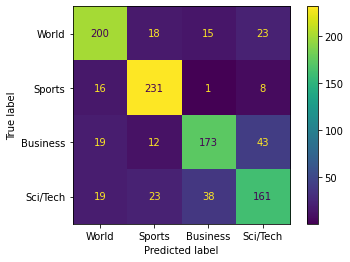

In [169]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, traindf.label)
print(f"Model score on training data: {rf.score(X_train, traindf.label):.2f}")
print(f"Model score on test data: {rf.score(X_test, testdf.label)}")

predictions = rf.predict(X_test)
cm = confusion_matrix(testdf.label, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["World", "Sports", "Business", "Sci/Tech"])
disp.plot()
plt.show()

# Word2Vec

We will now use a second vectorization technique, seen during the course lectures: word vectorization.  
Fisrt, we will use the Gensim library to compute or download pre-computed word embeddings.

In [170]:
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [171]:
!wget https://nlp.stanford.edu/data/glove.6B.zip 
!unzip glove.6B.zip > /dev/null 2>&1

--2022-11-14 10:41:42--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-11-14 10:41:42--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.01MB/s    in 2m 40s  

2022-11-14 10:44:23 (5.13 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]



In [172]:
glove_file = ('glove.6B.100d.txt')
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

The model is a mapping between words and their vector representations.

In [173]:
model['apple']

array([-0.5985   , -0.46321  ,  0.13001  , -0.019576 ,  0.4603   ,
       -0.3018   ,  0.8977   , -0.65634  ,  0.66858  , -0.49164  ,
        0.037557 , -0.050889 ,  0.6451   , -0.53882  , -0.3765   ,
       -0.04312  ,  0.51384  ,  0.17783  ,  0.28596  ,  0.92063  ,
       -0.49349  , -0.48583  ,  0.61321  ,  0.78211  ,  0.19254  ,
        0.91228  , -0.055596 , -0.12512  , -0.65688  ,  0.068557 ,
        0.55629  ,  1.611    , -0.0073642, -0.48879  ,  0.45493  ,
        0.96105  , -0.063369 ,  0.17432  ,  0.9814   , -1.3125   ,
       -0.15801  , -0.54301  , -0.13888  , -0.26146  , -0.3691   ,
        0.26844  , -0.24375  , -0.19484  ,  0.62583  , -0.7377   ,
        0.38351  , -0.75004  , -0.39053  ,  0.091498 , -0.36591  ,
       -1.4715   , -0.45228  ,  0.2256   ,  1.1412   , -0.38526  ,
       -0.06716  ,  0.57288  , -0.39191  ,  0.31302  , -0.29235  ,
       -0.96157  ,  0.15154  , -0.21659  ,  0.25103  ,  0.096967 ,
        0.2843   ,  1.4296   , -0.50565  , -0.51374  , -0.4721

It also has usefull methods to explore the  vocabulary's embeddings.  
Here are some examples to find the most similar words in the embedding space. 
Try with some other words and look if the most similar words seem plausibles.

In [174]:
model.most_similar('zuckerberg')

[('facebook', 0.6360230445861816),
 ('linkedin', 0.6329243183135986),
 ('myspace', 0.6072915196418762),
 ('saverin', 0.6035687923431396),
 ('dewolfe', 0.5960867404937744),
 ('friendster', 0.5935790538787842),
 ('twitter', 0.5506225824356079),
 ('salzman', 0.5457445383071899),
 ('zynga', 0.5324302911758423),
 ('berkowitz', 0.515297532081604)]

In [176]:
model.most_similar('google')

[('yahoo', 0.8637359142303467),
 ('microsoft', 0.8104099035263062),
 ('web', 0.7629813551902771),
 ('aol', 0.7571687698364258),
 ('facebook', 0.7516582012176514),
 ('internet', 0.7383222579956055),
 ('ebay', 0.7163311243057251),
 ('netscape', 0.7149453163146973),
 ('msn', 0.7122776508331299),
 ('online', 0.6866507530212402)]

In [177]:
model.most_similar('intelligence')

[('cia', 0.742180585861206),
 ('information', 0.7210196256637573),
 ('security', 0.6963101625442505),
 ('fbi', 0.6962289810180664),
 ('military', 0.6934822201728821),
 ('secret', 0.6893364191055298),
 ('counterterrorism', 0.6762625575065613),
 ('pentagon', 0.6651185154914856),
 ('defense', 0.6564568281173706),
 ('agents', 0.6406551599502563)]

In [178]:
model.most_similar(negative='network')

[('http://www.opel.com', 0.6100396513938904),
 ('rw95', 0.609157919883728),
 ('str94', 0.6089513301849365),
 ('js04bb', 0.5794222354888916),
 ('gph04bb', 0.5685352087020874),
 ('kd95', 0.5646697282791138),
 ('greg.wilcoxdailynews.com', 0.562753438949585),
 ('http://www.ecb.int', 0.5608885884284973),
 ('kanamori', 0.5443101525306702),
 ('jamadagni', 0.5430979132652283)]

An other cool feature of Word2Vec is the possibility to perform analogies.  
The most famous example is certainly king - man + woman = queen.  
Try to find other working analogies.

In [179]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.7699


In [180]:
result = model.most_similar(positive=['paris', 'spain'], negative=['france'])
print("{}: {:.4f}".format(*result[0]))

madrid: 0.8061


In [181]:
result = model.most_similar(positive=['clinton', 'republican'], negative=['democrat'])
print("{}: {:.4f}".format(*result[0]))

bush: 0.8654


In [182]:
result = model.most_similar(positive=['beer', 'france'], negative=['usa'])
for i in range(3):
  print("{}: {:.4f}".format(*result[i]))

champagne: 0.5996
wine: 0.5771
bordeaux: 0.5768


The following code plots a PCA or t-SNE representation of a list of words.
Use this method with your own list of words to see wether similar words are close to each other in the embedding space.

In [183]:
import numpy as np
from sklearn.decomposition import PCA

def plot_embeddings(model, words, reduction='pca'):       
    word_vectors = np.array([model[w] for w in words])
    if reduction == PCA:
      reductor = PCA(n_components=2)
    elif reduction == "tsne":
      reductor = TSNE(2, perplexity=20)
    X = reductor.fit_transform(word_vectors)
    plt.figure(figsize=(12,12))
    plt.scatter(X[:,0], X[:,1])
    for word, x in zip(words, X):
        plt.text(x[0]+0.05, x[1]+0.05, word)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


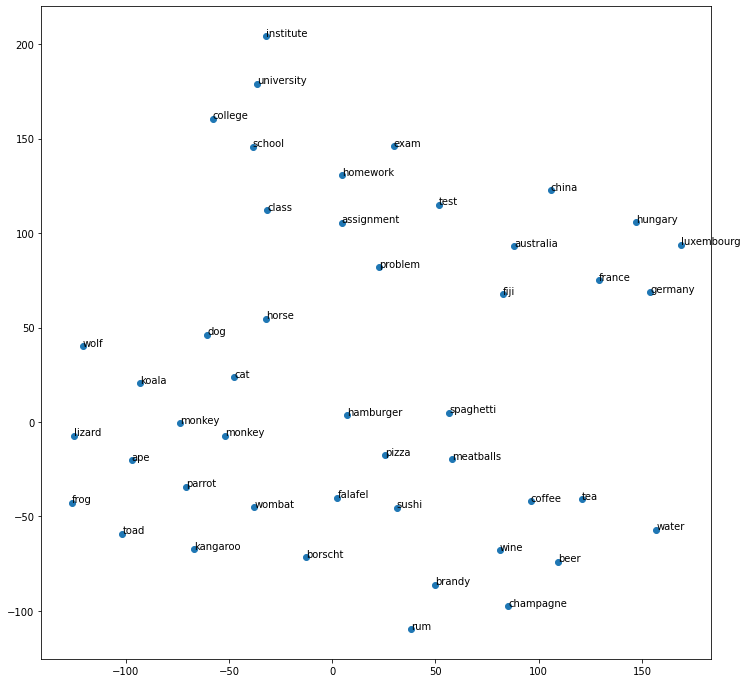

In [184]:
word_list = ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute']

plot_embeddings(model, words=word_list, reduction='tsne') 

We will now use these pre-computed embeddings to build the document representations.  
A simple way to compute a document representation from word embeddings consists in computing the mean or the sum of all the document's word embeddings.  
Here, since the documents do not have the same length, it is preferable to use the mean.  
Fill in the following code to compute the mean embeddings of all documents.  
Since this process is a little bit long, we will use a limited amount of documents during the practical session. Nonetheless, feel free to try with the complete dataset at home.  

In [187]:
from tqdm import tqdm
tqdm.pandas()

traindf = pd.read_csv('train.csv', names=["label", "title", "text"]).sample(1000)
testdf = pd.read_csv('test.csv', names=["label", "title", "text"]).sample(200)

traindf['label'] = traindf['label'] -1
traindf['label_name'] = traindf.label.map({0:"World", 1:"Sports", 2:"Business", 3:"Sci/Tech"})
testdf['label'] = testdf['label'] -1
testdf['label_name'] = testdf.label.map({0:"World", 1:"Sports", 2:"Business", 3:"Sci/Tech"})

def compute_mean_embeddings(s, model, words_list, dim=100):
  s = s.lower() # convert to lower case
  emb_list = [model[w] for w in s if w in words_list]
  if emb_list != []:
    return np.mean(emb_list) # compute the mean
  else:
    return np.zeros(dim) # return a vector filled with 0 if the list is empty

words_list = model.index2entity
traindf['mean_embeddings'] = traindf.text.progress_apply(lambda s: compute_mean_embeddings(s, model, words_list))
testdf['mean_embeddings'] = testdf.text.progress_apply(lambda s: compute_mean_embeddings(s, model, words_list))

100%|██████████| 200/200 [00:52<00:00,  3.80it/s]


The following code extracts the computed embeddings from the dataframe.  
Use these to train a model to predict the article category.  
Print your testing performance and plot a confusion matrix.  
The results may be a little bit disappointing. Any idea why?

Model score on training data: 0.99
Model score on test data: 0.245


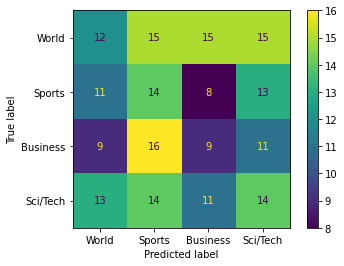

In [190]:
X_train = np.vstack(traindf['mean_embeddings'].values)
X_test = np.vstack(testdf['mean_embeddings'].values)


rf = RandomForestClassifier()
rf.fit(X_train, traindf.label)
print(f"Model score on training data: {rf.score(X_train, traindf.label):.2f}")
print(f"Model score on test data: {rf.score(X_test, testdf.label)}")

predictions = rf.predict(X_test)
cm = confusion_matrix(testdf.label, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["World", "Sports", "Business", "Sci/Tech"])
disp.plot()
plt.show()

Plot a t-SNE of the computed embeddings.  
Is it a good representation to classify documents? NOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO

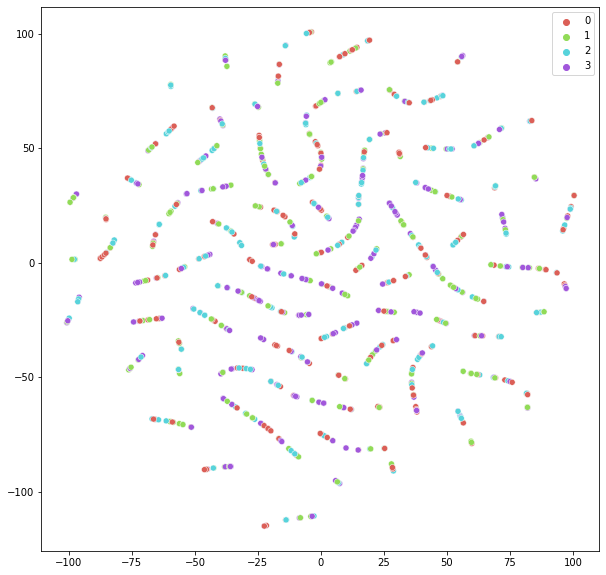

In [189]:
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity= 3).fit_transform(X_train)
plt.figure(figsize=(10,10))                  
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], palette=sns.color_palette("hls", 4),hue=traindf["label"].tolist())
plt.show()

We will now try with custom Word2Vec representations.  
Gensim allows to train Word2Vec representations in a few lines of codes.  
Since our vocabullary is smaller than the one used for the pre-computed Word2Vec, we can now use more samples (the embedding look-up will be cheaper to process).

In [ ]:
traindf = pd.read_csv('train.csv', names=["label", "title", "text"]).sample(10000)
testdf = pd.read_csv('test.csv', names=["label", "title", "text"]).sample(1000)

traindf['label'] = traindf['label'] -1
traindf['label_name'] = traindf.label.map({0:"World", 1:"Sports", 2:"Business", 3:"Sci/Tech"})
testdf['label'] = testdf['label'] -1
testdf['label_name'] = testdf.label.map({0:"World", 1:"Sports", 2:"Business", 3:"Sci/Tech"})

It might be worth applying our tokenizer to reduce the vocabulary size.  
Fill the following code to create a new field with tokenized texts.

In [ ]:
traindf["tokenized"] = traindf.text.apply(lambda s: tokenizer(s))
testdf["tokenized"] = testdf.text.apply(lambda s: tokenizer(s))

We will now train our own Word2Vec.  
Look at the official [documentation](https://radimrehurek.com/gensim/models/word2vec.html).  
What does the ```window``` argument stands for? What type of model are we using (CBOW or Skip-gramm).

In [ ]:
from gensim.models import Word2Vec

model=Word2Vec(traindf["tokenized"],size=100,window=5,min_count=2)
model.train(traindf["tokenized"], total_examples=model.corpus_count, epochs=200)

Now train a model on these custom embeddings and evaluate it on the testing set.

In [ ]:
words_list = model.wv.index2entity
traindf['mean_embeddings'] = traindf.text.progress_apply(lambda s: compute_mean_embeddings(s, model, words_list))
testdf['mean_embeddings'] = testdf.text.progress_apply(lambda s: compute_mean_embeddings(s, model, words_list))

X_train = np.vstack(traindf['mean_embeddings'].values)
X_test = np.vstack(testdf['mean_embeddings'].values)

...

PLot a t-SNE of these new embeddings (use the test set to avoid to many points).  Does it seem better?

In [ ]:
...

Word2Vec is an self-supervised learning of words represenations. Thus all words representations are meaningfull and have an equal impact when computing the mean.  This means that category irrelevant words have an equal importance in the document average represenatation than other words more related to the category.  
Computing the average of word embeddings learned with self-supervised learning is not very efficient for document classification.  
In the following we will see two alternatives using deep neural networks:


1.   Replace the mean by a recurrent layer responsible for filtering informative words within the sequence
2.   Learn our word embeddings at the same time as we learn the classification function



For the rest of this notebook we will need a GPU to speed-up trainings.  
Go to __Runtime__ and change your runtime type to GPU.  
Then run the following command and retart your runtype.

In [ ]:
!pip3 install torch==1.9.1+cu111
!pip3 install torchtext==0.10.1

Since we changed our runtime we need to re-download the datasets.

In [ ]:
!wget https://github.com/mhjabreel/CharCnn_Keras/raw/master/data/ag_news_csv/train.csv 2>&1
!wget https://github.com/mhjabreel/CharCnn_Keras/raw/master/data/ag_news_csv/test.csv 2>&1

The following code will load the datasets in a format compatible with pytorch.  
During the process, texts will be tokenized using the [Spacy tokenizer](https://spacy.io/usage/linguistic-features#how-tokenizer-works), we won't need to do it ourself.

In [ ]:
import torch
import torchtext
from torchtext.legacy.data import Field, LabelField, TabularDataset, BucketIterator

TEXT = Field(tokenize='spacy',batch_first=True,include_lengths=True)
LABEL = LabelField(dtype = torch.long, batch_first=True)
fields = [('label', LABEL), ('title', TEXT), ('text',TEXT)]
trainset = TabularDataset(path = 'train.csv',format = 'csv',fields = fields, skip_header = True)
testset = TabularDataset(path = 'test.csv',format = 'csv',fields = fields, skip_header = True)

Here is an example of one sample of the processed dataset.

In [ ]:
print(vars(trainset.examples[0]))

We will used the same pre-trained Word2Vec than previously.  
Once again, since we changed our runtime, we need to download the corresponding files.

In [ ]:
!wget https://nlp.stanford.edu/data/glove.6B.zip 
!unzip glove.6B.zip > /dev/null 2>&1

The following code loads the pre-computed embeddings and builds the corresponding vocabulary.

In [ ]:
glove = torchtext.vocab.Vectors('glove.6B.100d.txt')
TEXT.build_vocab(trainset,min_freq=3)
TEXT.vocab.set_vectors(glove.stoi, glove.vectors, dim=100)
LABEL.build_vocab(trainset)

In [ ]:
torch.cuda.init()
torch.cuda.empty_cache()
print('CUDA MEM:',torch.cuda.memory_allocated())

print('cuda:', torch.cuda.is_available())
print('cude index:',torch.cuda.current_device())

We will use a [```BucketIterator```](https://torchtext.readthedocs.io/en/latest/data.html#bucketiterator) to generate mini-batches of token sequences.  
BucketIterators generate batches of examples of similar lengths while minimizing the amount of padding needed (padding here corresponds to adding a padding token to the sequence).  
The ```sort_key``` parameter is used to sort text sequences in batches. Here we want to use sequences of similar length, so we use a function returning a sequence's length.  
This is used with the complementary argument ```sort_with_batch```, which indicates sorting sequences with mini-batches only and not within the entire dataset.

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  
batch_size = 64

train_loader, test_loader = BucketIterator.splits(
    (trainset, testset), 
    batch_size = batch_size,
    sort_key = lambda x: len(x.text),
    sort_within_batch=True,
    device = device)

We will now define our network architecture.  
It is composed of:

*   an embedding layer responsible for the mapping between tokens
*   several recurrent LSTM layers
*   a final fully connected layer

Here we will use pretrained embeddings and freeze their "weights".  
This is maybe to new for asking you to implement the architecture yourself, but make an effort to understand the following code.  

In [ ]:
import torch.nn as nn

class TextClassifier(nn.Module):
    
  def __init__(self, vocab, embedding_dim, hidden_dim=32, nb_lstm_layers=2, dropout=0.2, output_dim=4):
      super().__init__()          
      
      #embedding layer
      self.embedding = nn.Embedding.from_pretrained(TEXT.vocab.vectors)
      self.embedding.weight.requires_grad = False
      self.lstm = nn.LSTM(embedding_dim, 
                          hidden_dim, 
                          num_layers=nb_lstm_layers, 
                          dropout=dropout,
                          batch_first=True)
      self.fc = nn.Linear(hidden_dim, output_dim)
      
  def forward(self, text, text_lengths): 
      embedded = self.embedding(text)    
      #packed sequence
      packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, text_lengths.cpu(), batch_first=True)
      _, (hidden, cell) = self.lstm(packed_embedded)
      outputs=self.fc(hidden[1])        
      return outputs

Complete the following code to implement the training and testing routines.

In [ ]:
from tqdm.notebook import tqdm


def test(model, dataloader):
    model.eval()
    test_corrects = 0
    total = 0
    with torch.no_grad():
        for data in dataloader:
            text, text_lengths = data.text
            labels = data.label

            pred = model(text, text_lengths).squeeze()
            _, predicted = pred.max(1)
            test_corrects += predicted.eq(labels).sum().item()
            total += labels.size(0)
    return test_corrects / total


def train(model, dataloader, optimizer, criterion, epochs=5):
  model.train()  
  for epoch in range(epochs): 
    running_loss = 0.0
    running_corrects = 0
    total = 0 
    t = tqdm(dataloader)
    for i, batch in enumerate(t):
      text, text_lengths = batch.text
      labels = batch.label

      pred = model(text, text_lengths).squeeze() #convert to 1D tensor
      loss = criterion(pred, labels)
      
      _, predicted = ...
      running_corrects += ...
      total += ...
      running_loss += loss.item()

      ... #zero grad your optimizer
      ... # backward the loss  
      ... # perform a step
            
      t.set_description(f"epoch:{epoch} loss: {(running_loss / (i+1)):.4f} current accuracy:{round(running_corrects / total * 100, 2)}%")

Now, instantiate a model and its corresponding optimizer, choose the right criterion (loss function) to train your model, and evaluate its performance on both the training and testing sets.

In [ ]:
import torch.optim as optim
embedding_size = 100
model =  ... # send your model to gpu with .to(device)
optimizer = ... # use Adam with defautl parameters
criterion = ... # choose the correct criterion
print(model)

In [ ]:
train(...)
train_acc = ...
print(f"Train accuracy: :{round(train_acc * 100, 2)}%")
test_acc = ...
print(f"Test accuracy: :{round(test_acc * 100, 2)}%")


We saw that using the mean of embeddings learned by self-supervised learning is ineffective.  
This comes from the fact that all the words present in the corpus are given equal importance.  
Another solution could be to learn the embeddings while learning to classify.  
We will do this now, still using the mean to compute the final text representation.  
To do so, we will use a particular layer in pytorch called [```EmbeddingBag```](https://pytorch.org/docs/stable/generated/torch.nn.EmbeddingBag.html#torch.nn.EmbeddingBag).  
This layer computes the mean value of a “bag” of embeddings. Although the text entries here have different lengths, nn.EmbeddingBag module requires no padding here since it only computes the means.  
We will now implement a simple network as illustarted bellow computing the mean of embeddings to classify texts.  
This time we wont freeze the embeddings since we are aiming to learn theme while learning to classify.  
![](https://pytorch.org/tutorials/_images/text_sentiment_ngrams_model.png)  
Source (https://pytorch.org/tutorials/beginner/text_sentiment_ngrams_tutorial.html)

In [ ]:
class TextClassifier(nn.Module):

  def __init__(self, vocab_size, embedding_dim, output_dim=4):
    super().__init__()  
    self.embedding = nn.EmbeddingBag(vocab_size, embedding_dim, sparse=True)
    self.fc = nn.Linear(embedding_dim, output_dim)

  def forward(self, text, _): # we just add a third factice _ argument to make this forward compatible with our previous training method
    embedded = self.embedding(text)
    return self.fc(embedded)

  def get_embeddings(self, text):
    return self.embedding(text)

We need to build a new vocabulary from our corpus.

In [ ]:
TEXT.build_vocab(trainset,min_freq=3)
vocab_size = len(TEXT.vocab)

Now, instantiate a model and its corresponding optimizer, choose the right criterion to train your model, and evaluate its performance on both the training and testing sets.

In [ ]:
model = ...
optimizer = torch.optim.SGD(model.parameters(), lr=0.5)
train(...)
train_acc = ...
print(f"Train accuracy: :{round(train_acc * 100, 2)}%")
test_acc = ...
print(f"Test accuracy: :{round(test_acc * 100, 2)}%")

Is the obtained test perfoamnce better than the one of the previous models using the mean?

Now try to do the same but using LSTM layer instead of embeddings averages.

In [ ]:
import torch.nn as nn

class TextClassifier(nn.Module):
    
  def __init__(self, vocab_size, embedding_dim, output_dim=4):
    super().__init__()  
    self.embedding = ...
    self.lstm = ...
    self.fc = ...
      
  def forward(self, text, text_lengths): 
      embedded = self.embedding(text)    
      #packed sequence
      packed_embedded = ...
      _, (hidden, cell) = ...
      outputs = ...        
      return outputs

In [ ]:
model = ...
optimizer = torch.optim.SGD(model.parameters(), lr=0.5)
train(...)
train_acc = test(...)
print(f"Train accuracy: :{round(train_acc * 100, 2)}%")
test_acc = test(...)
print(f"Test accuracy: :{round(test_acc * 100, 2)}%")

# Transformers ! 

Transformers models are the current state-of-the-art in natural language processing.  
We have not seen them during the video lectures since studying transformers would require an entire session in itself.  
Nonetheless, we will see how to use them as "black-box" models to finish this practical session.

Let $\mathbf{X} \in \mathbb{R}^{B  \times N\times F}$ be the input sequence, $\mathbf{W}^Q, \mathbf{W}^K, \mathbf{W}^V \in \mathbb{R}^{F \times H}$ be the query, key and value projection matrix.

We define the query, the key and the value as $\mathbf{Q}=\mathbf{X} \mathbf{W}^Q, \mathbf{K}=\mathbf{X} \mathbf{W}^K, \mathbf{V}=\mathbf{X} \mathbf{W}^V \in \mathbb{R}^{B \times N\times H}$.

Self attention compute a score $E =\frac{\mathbf{Q K}^T}{\sqrt{d_k}} \ \in \mathbb{R}^{B \times N\times N}$ that measure the similarity between the elements in the input sequence.
The normalized attention weights $\alpha_{i j}=\frac{\exp \left(e_{i j}\right)}{\sum_{k=1}^{T_x} \exp \left(e_{i k}\right)}$ are computed using softmax function on $E$ 

The output of the self attention layer is given by : 
$$\mathbf{Y}=\operatorname{Attention}(\mathbf{Q}, \mathbf{K}, \mathbf{V})=\operatorname{softmax}\left(\frac{\mathbf{Q} \mathbf{K}^T}{\sqrt{d_k}}\right) \mathbf{V}$$. The features of each sequence element are therefore weighted according to the context.
It is possible to use several attention mechanisms in parallel and aggregate them to obtain the final output : 
$$MultiHead(\mathbf{Q}, \mathbf{K}, \mathbf{V})= Concat \left(\right. head _1, \ldots, head \left._h\right) \mathbf{W}^O$$

where $head_i= Attention \left(\mathbf{Q} \mathbf{W}_i^Q, \mathbf{K} \mathbf{W}_i^K, \mathbf{V} \mathbf{W}_i^V\right)$

[Hugging Face](https://huggingface.co/) provides the most practical [library](https://huggingface.co/docs/transformers/main/en/index) to use transformers and pre-trained models.

In [ ]:
!pip install transformers[torch] 2>&1

In [ ]:
import pandas as pd

train_df = pd.read_csv('train.csv', names=["label", "title", "text"]).sample(40000)
test_df = pd.read_csv('test.csv', names=["label", "title", "text"]).sample(2000)

Separate the train set into a train and validation sets using sklearn's **train_test_split**.

Keep 20% of the data for the validation set, and remember to stratify! 

In [ ]:
from sklearn.model_selection import train_test_split

train, val, train_labels, val_labels = ...

\As with for computer vision, it is possible to use pre-trained models for transfer learning in NLP. 
[Bert](https://arxiv.org/abs/1810.04805) is one of the most famous standard transformer in NLP. In in its largest form it is composed of 345 million parameters.  
In this practical session we will use a smaller version: Distilbert. [Distilbert](https://arxiv.org/abs/1910.01108) is a smaller model that has been trained to mimic the outputs of the Bert model.   
This [distillation](https://arxiv.org/abs/1503.02531) process provides a model achieving very good performance with much less parameters.  
To use pre-trained model we will need to match the toke they were trained on.
Here we will uses the use the ```DistilBertTokenizerFast``` to manage the texts preprocessing. 

In [ ]:
from transformers import DistilBertTokenizerFast

tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

We will also need wrap our datasetd into Pytorch compatible datasets.  
The following code defines a Torch Dataset to handle our textual data.

In [ ]:
import torch
from torch.utils.data import Dataset

class NlpDataset(Dataset):
    def __init__(self,data,labels,tokenizer):
        self.data = data.to_list()
        self.labels = labels.tolist()
        self.encodings = tokenizer(self.data, truncation=True, padding=True)

    def __getitem__(self,idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx],dtype=torch.long)
        return item
  
    def __len__(self):
        return len(self.labels)

Convert your datasets to torch compatible Datasets.

In [ ]:
from torch.utils.data import DataLoader

train_dataset = ...
val_dataset = ...
test_dataset = NlpDataset(test_df["text"], test_df["label"]-1, tokenizer)

batch_size = 64
train_loader = ...
val_loader = ...
test_loader = DataLoader(test_dataset, batch_size=1) # we need a batch size at 1 for later in the notebook

Look at a sample yielded by your train loader.  
What type of object is that? Do you know what it is composed of?

In [ ]:
next(iter(train_loader))

We will now instanciate our model and wrapp it into a Pytorch module.

In [ ]:
from transformers import  DistilBertForSequenceClassification
import torch.nn as nn 

class BertClf(nn.Module):

    def __init__(self, distilbert):

        super(BertClf, self).__init__()

        self.distilbert = distilbert
        for name, param in distilbert.named_parameters():
            if not "classifier" in name:
                param.requires_grad = False

    def forward(self, sent_id, mask):

        #pass the inputs to the model  
        out = self.distilbert(sent_id, attention_mask=mask)
        logits = out.logits
        attn = out.attentions
        hidden_states = out.hidden_states
        

        return logits, hidden_states, attn

distilbert = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased",
                                                                  num_labels=4,
                                                                  output_attentions=True,
                                                                  output_hidden_states=True)

model = BertClf(distilbert)

Now complete the following training and testing loops.

In [ ]:
from tqdm.notebook import tqdm

def train_bert(model, optimizer, dataloader, epochs):
  model.train()
  for epoch in range(epochs):
    running_loss = 0.0
    running_corrects = 0
    total = 0
    t = tqdm(dataloader)
    for i, batch in enumerate(t):
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)
        preds, _, _ = model(input_ids,mask=attention_mask)
        loss = ...

        ... #zero grad your optimizer
      ... # backward the loss  
      ... # perform a step

        _, predicted = ...
        running_corrects += predicted.eq(labels).sum().item()
        total += labels.size(0)
        running_loss += loss.item()

        t.set_description(f"epoch:{epoch} loss: {(running_loss / (i+1)):.4f} current accuracy:{round(running_corrects / total * 100, 2)}%")

def test_bert(model, dataloader):
    model.eval()
    test_corrects = 0
    total = 0
    with torch.no_grad():
      for batch in tqdm(dataloader):
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        preds, _, _ = model(input_ids,mask=attention_mask)
        _, predicted = preds.max(1)
        test_corrects += predicted.eq(labels).sum().item()
        total += labels.size(0)
    return test_corrects / total

Now train a model for one epoch and print its accuracy on the test set.

In [ ]:
from transformers import DistilBertTokenizerFast,  DistilBertForSequenceClassification, AdamW

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
optimizer = AdamW(model.parameters(),lr = 1e-5)
criterion  = nn.CrossEntropyLoss()
n_epochs = 1

train_bert(model, optimizer, train_loader, n_epochs)
test_bert(model, test_loader)

The following code computes the embeddings generated by the DistilBert model.  
Use it to plot a t-SNE of the DistilBert's represntations of the test set.  
How are the different classes distributed?

In [ ]:
import numpy as np

def get_embeddings(model, dataloader):
    model.eval()
    embeddings = []
    labels = []
    with torch.no_grad():
      for batch in tqdm(dataloader):
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels.append(batch["labels"].item())

        _, emb, _ = model(input_ids,mask=attention_mask)
        last_layer_cls = emb[-1][:,0,:]
        embeddings.append(last_layer_cls.squeeze(0).squeeze(0))
    embeddings = np.array([e.cpu().numpy() for e in embeddings])
    return embeddings, labels

embeddings, labels = get_embeddings(model, test_loader)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns 

tsne = TSNE(n_components=2, init='random')
X_tsne = tsne.fit_transform(embeddings)
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=X_tsne[:,0], y=X_tsne[:,1],
    hue=labels,
    palette=sns.color_palette("hls", 4),
    legend="full")

We can[ **bertviz** library](https://github.com/jessevig/bertviz) to visualize the relation of the element in the input sequence

In [ ]:
!pip install bertviz

In [ ]:
from bertviz import model_view,head_view

sentence = test_df["text"].iloc[33]
tokenized = tokenizer(sentence)
print(sentence)
print(tokenized)

In [ ]:
inputs = torch.tensor(tokenized["input_ids"]).unsqueeze(0).to(device)
mask = torch.tensor(tokenized["attention_mask"]).unsqueeze(0).to(device)
outputs = model(inputs,mask = mask)
attention = outputs[-1] 
tokens = tokenizer.convert_ids_to_tokens(inputs[0]) 
model_view(attention, tokens)

In [ ]:
head_view(attention, tokens)